In [43]:
import numpy as np
from sklearn import svm
from skimage.feature import hog
from imageio import imread
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image
import scipy.misc

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
symbols = ["0", "+", "|", "-", "!", "=", "forward_slash"]

In [68]:
def find_gradient(img, mode="colored"):
    h, w = len(img), len(img[0])

    if mode == "colored":
        brightness = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 \
                + img[:, :, 2] * 0.114
    elif mode == "bw":
        brightness = img.astype(dtype="float32")
    partial_x = np.zeros((h, w))
    partial_y = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            if j == 0:
                partial_x[i][j] = brightness[i][1] - brightness[i][0]
            elif j == w - 1:
                partial_x[i][j] = brightness[i][j] - brightness[i][j - 1]
            else:
                partial_x[i][j] = brightness[i][j + 1] - brightness[i][j - 1]
            if i == 0:
                partial_y[i][j] = brightness[1][j] - brightness[0][j]
            elif i == h - 1:
                partial_y[i][j] = brightness[i][j] - brightness[i - 1][j]
            else:
                partial_y[i][j] = brightness[i + 1][j] - brightness[i - 1][j]
    
    energy = ((partial_x ** 2 + partial_y ** 2) ** 0.5).astype(dtype='float32')
    direction = np.arctan2(partial_x, partial_y).astype(dtype='float32')
    
    return energy, direction

In [46]:
from os import listdir
from os.path import isfile, join
mypath = "extracted_images/"

train_images = []
train_labels = []
empty = np.ndarray(shape=[45, 45])
empty.fill(255)

train_size = 500

for sym in symbols:
    files = [f for f in listdir(mypath + sym) if isfile(join(mypath + sym, f))][:train_size]
    for file in files:
        img = imread(mypath + sym + "/" + file)
        train_images.append(img)
        train_labels.append(symbols.index(sym) + 1)

for i in range(500):
    train_images.append(empty)
    train_labels.append(0)

test_images = []
test_labels = []

test_size = 500

for i in range(500):
    test_images.append(empty)
    test_labels.append(0)

for sym in symbols:
    files = [f for f in listdir(mypath + sym) if isfile(join(mypath + sym, f))][train_size:train_size + test_size]
    for file in files:
        img = imread(mypath + sym + "/" + file)
        test_images.append(img)
        test_labels.append(symbols.index(sym) + 1)
        

In [47]:
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

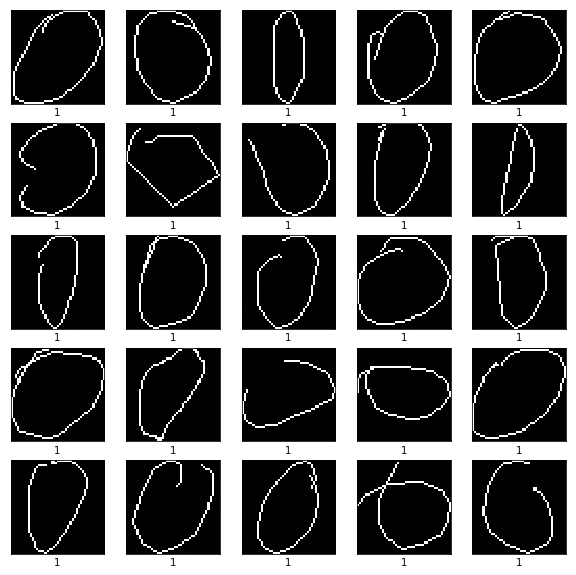

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(45, 45)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
3699/3699 [==============================] - 1s 318us/step - loss: 1.9705 - acc: 0.2693
Epoch 2/50
3699/3699 [==============================] - 1s 286us/step - loss: 1.5537 - acc: 0.4826
Epoch 3/50
3699/3699 [==============================] - 1s 309us/step - loss: 1.2748 - acc: 0.5699
Epoch 4/50
3699/3699 [==============================] - 1s 338us/step - loss: 1.1120 - acc: 0.6488
Epoch 5/50
3699/3699 [==============================] - 1s 256us/step - loss: 0.9520 - acc: 0.7083
Epoch 6/50
3699/3699 [==============================] - 1s 306us/step - loss: 0.8299 - acc: 0.7621
Epoch 7/50
3699/3699 [==============================] - 1s 314us/step - loss: 0.7858 - acc: 0.7597
Epoch 8/50
3699/3699 [==============================] - 1s 386us/step - loss: 0.6960 - acc: 0.7945
Epoch 9/50
3699/3699 [==============================] - 1s 361us/step - loss: 0.6519 - acc: 0.8216
Epoch 10/50
3699/3699 [==============================] - 1s 226us/step - loss: 0.5895 - acc: 0.8473
Epoch 11/

In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

symbols[-1] = "/"

3500/3500 [==============================] - 1s 354us/step
Test accuracy: 0.947428571496691


In [53]:
def solution(gradient, parts_x, parts_y):
    cells = []
    splt = [np.array_split(el, parts_x, 1) for el in np.array_split(gradient, parts_y, 0)]
    for line in splt:
        for cell in line:
            cells.append(np.array(Image.fromarray(cell).resize((45, 45))))
    
    
    ans = model.predict(np.array(cells) / 255.0)
    lines = parts_x
    for i in range(len(cells)):
        if i % lines == 0:
            print()
        if np.argmax(ans[i]) == 0:
            print(" ", end="")
        else:
                print(symbols[np.argmax(ans[i]) - 1], end="")

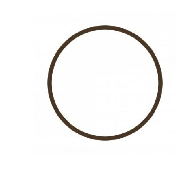


                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                       |=++++++++++++++++++||                                       
                                 ==+++= 00++0!!!!!!!!!!0-++== +++|=                                 
                             ==++- 0+!==!                  !==!-+= ++==                             
                          ==+- 00==                              !!!+ !++=                          
                        =+0 0!=                                      !!+00+|              

In [54]:
from PIL import Image

img = imread("circle.jpg")
ax = plt.axes([0.1, 0.1, 0.5, 0.5], frameon=True)
ax.imshow(img)
ax.axis('off')
plt.show()
img = imread("circle.jpg")
img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 \
                + img[:, :, 2] * 0.114
solution(img, 100, 50)

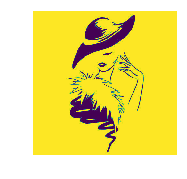


                                                                                                    
                                                                 =+                                 
                                       |=++++++0              =+=|0                                 
                                    =++!=      ! =         =++=00=+                                 
                                   +++0!          ====++++=+00000+0                                 
                                  +++00|=+            =++++0000+!!                                  
                                 +++00++++=-++=     =++=++0000000                                   
                                 ==00000=|+=+= 0-=++=+++==0000!=                                    
                                ++000000=0+-==!-+=-++000===0!=                                      
                                0+++=+|==++=|+!=+0000=0+0+0                               

In [55]:
img = imread("lady.jpg")
ax = plt.axes([0.1, 0.1, 0.5, 0.5], frameon=True)
ax.imshow(img)
ax.axis('off')
plt.show()
solution(img, 100, 50)

In [56]:
print(symbols)

['0', '+', '|', '-', '!', '=', '/']


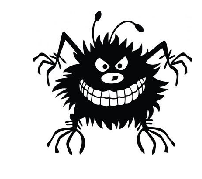


                                    +++                                                             
                                   -==0                                                             
                                   ++00                                                             
                                   +==            =++++++|                                          
                                  +0            =+0=     0+++|                                      
                                  +            +0         0+!-+                                     
                 |                +           +=           0!++                                     
                -=+0              +       +  +=|                                                    
                +===+             +  +0  +  +0 0+                                                   
                0=-+-+0      0    + ++= +=  / ++0=  =+                        ||          

In [57]:
img = imread("monster.jpg")
ax = plt.axes([0.1, 0.1, 0.5, 0.5], frameon=True)
ax.imshow(img)
ax.axis('off')
plt.show()
img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 \
                + img[:, :, 2] * 0.114
solution(img, 100, 50)

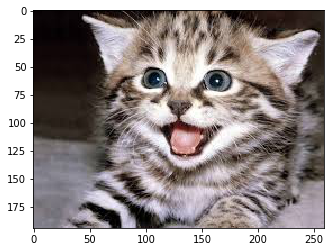

In [58]:
kitten = imread("kitten.jpeg")
plt.imshow(kitten, cmap='gray', vmin=0, vmax=255)
plt.show()

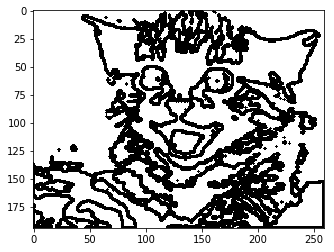

In [59]:
im = cv2.imread('kitten.jpeg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

In [60]:
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)


                                      =+|  ++|0+00+| +=                                             
              +0++0  +0              |0|00+0!000!00|  -|-+                                          
              0-+0--+|| -+-  !+0=+||+00||0! 00+| | 0   +--+                                         
                !!++!!+-+=0|||00|0000-0-00= +0|=0+ 0 + +-+|+  =+|=|0                                
                 00+0   !0!!!!0-00+-0-0 |00+|-0 ++=0|0+00+0= -000000=|                  |==+++++=0  
                  0-           +0|0 +0==00 0+000-|=00=!|++0==+000==!-0+|           ===+0+!!==|+000+ 
                  ++           0000+|-000++0-00!+0+0-|=00 +00000+=0  !!++0+++++++0++0!=   +++0!=0|  
                   +0         ++0+00!|00  0000+-|0=!=000 +-0000000+        ====           -0=+000=  
                   +=         +!  +0000=  000000-+  ++0-0-=-000000+                        ===+0=   
                   -0         + ||00!++!  !0++!+!= +| 0 0   !!0|==                        

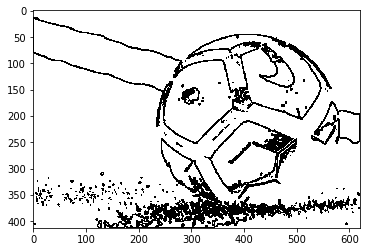

In [61]:
im = cv2.imread('ball.jpg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

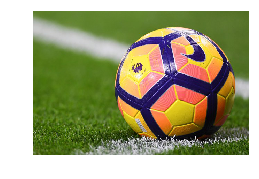


                                                                                                    
=|                                                                                                  
 !0++|                                                                                              
     !=+++|                                                                                         
          !0+===                                                                                    
                ==++                                    ==++0======0+++=||                          
                    =++=|                           =++==      ===+=|   !0++0                       
                        !!+|||                   =+0=      |+-=!!=+++!=0  !++++=                    
0                          !!!0++-+=           =+==+++====!0    =++= ++++0    0++=                  
0++=                                =++=|    =+-!=+-      |++=+0=     !0++|0   !!++/      

In [62]:
img = imread("ball.jpg")
ax = plt.axes([0.1, 0.1, 0.5, 0.5], frameon=True)
ax.imshow(img)
ax.axis('off')
plt.show()
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)

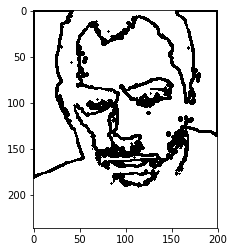

In [63]:
im = cv2.imread('law.jpg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

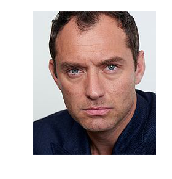


0===================00                                                      0+0====================0
0                 +0+!                               -+++++++|0              !!-++0                0
0              ==+00!         ==+++               =++=0=   !=!-++=0             !=0=               0
0             -0|=          -+++000=              |-000         =-++              =00              0
0             -0          -++=   -0+/   +=     =+000!==           /0=             !-+=             0
0             +0        -++=      0+0=0  =++++000===               !++++|           0=             0
0            -0=        +0          000+=+0++-!==                    ===-+=         -0/            0
0            =0|       +0|0          -++==                               00+        0+-            0
0            0|=       -00!0                                              =0       /!-0/           0
0           =0=        -0000                                             00!         !0=  

In [64]:
img = imread("law.jpg")
ax = plt.axes([0.1, 0.1, 0.5, 0.5], frameon=True)
ax.imshow(img)
ax.axis('off')
plt.show()
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)

In [65]:
gradient = find_gradient(kitten)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

NameError: name 'find_gradient' is not defined

In [ ]:
solution(gradient_new, 100, 50)

In [ ]:
ball = imread("ball.jpg")
gradient = find_gradient(ball)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
solution(gradient_new, 100, 50)

In [ ]:
law = imread("law.jpg")
gradient = find_gradient(law)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
solution(gradient_new, 100, 50)

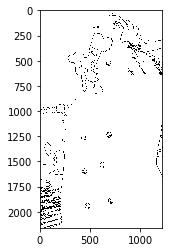


                                                         ===                                        
                                                     = 0======  +=                                  
                                                     0-    == -=|!=+-0=+-=                          
                                          =0===-          = =+-|=0+  0++  0=0==0                    
                                           0              !==  !   0   --  ==  0                    
                                          0+===0=+               00          000+=                  
                                         0=       !======+=      0    0        =-=+==   =      !====
                                        0=               =0     ++===! 0+=+ |-= !!  0--0 !====!     
                                       +=--===        !=-0            0++-====+ ==            !===- 
                          !=-==+--0    /+==   + +=+===!0                 ++0= =0=0+-+=0+==

In [83]:
im = cv2.imread('ex1.jpg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)

In [ ]:
kors = imread("ex1.jpg")
gradient = find_gradient(kors)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()
solution(gradient_new, 100, 50)